# 1. 데이터 준비하기
## MNIST 숫자 손글씨 Dataset 불러들이기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


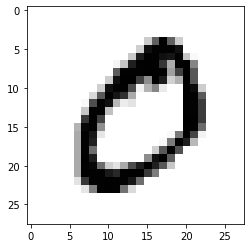

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

- Y항목(위 코드의 y_train, y_test)에는 X항목에 들어있는 이미지에 대응하는 실제 숫자 값이 담겨 있다.

In [3]:
print(y_train[1])

0


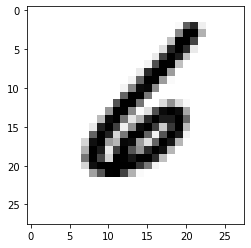

1000 번째 이미지의 숫자는 바로  6 입니다.


In [8]:
index=10000     
plt.imshow(x_train[999],cmap=plt.cm.binary)
plt.show()
print( (999+1), '번째 이미지의 숫자는 바로 ',  y_train[999], '입니다.')

## 학습용 데이터와 시험용 데이터

In [10]:
# 학습용 데이터

print(x_train.shape)

(60000, 28, 28)


In [11]:
# 시험용 데이터 개수

print(x_test.shape)

(10000, 28, 28)


## 데이터 전처리하기

In [12]:
# 손글씨 이미지의 실제 픽셀 값은 0~255

print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [13]:
# 0~1 사이의 값으로 정규화 (픽셀 값 255로 나눠주기)

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


---
# 2. 딥러닝 네트워크 설계하기

## Sequential Model을 사용해보기   
텐서플로우 케라스(tf.keras)에서 Sequential API 방법 사용

In [14]:
# tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


- Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수입니다. 여기서는 16과 32를 사용했습니다. 가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 뜻입니다. 우리의 숫자 이미지는 사실 매우 단순한 형태의 이미지입니다. 만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상일 것입니다. 그럴 경우에는 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있습니다.
- Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자 입니다. 이 값이 클수록 보다 복잡한 분류기를 만들 수 있습니다. 10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개, 소문자 26개로 총 52개의 클래스를 분류해 내야 합니다. 그래서 32보다 큰 64, 128 등을 고려해 볼 수 있을 것입니다.
- 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지정하면 됩니다. 숫자 인식기에서는 10, 알파벳 인식기에서는 52가 되겠지요.

**Q. 입력 이미지의 형태 input_shape=(28, 28, 1) 코드가 의미하는 바는 무엇일까요?**

A. 순서대로 이미지 높이, 이미지 너비, 채널 수 입니다.   
input data가 28*28 사이즈인 흑백 이미지

In [15]:
# 딥러닝 네트워크 모델 확인

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

# 3. 딥러닝 네트워크 학습시키기   
- 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태
- x_train.shape이 (60000, 28, 28) 로 채널수에 대한 정보가 없으므로 채널수 1(흑백)을 넣어 (60000, 28, 28, 1)로 만들어주기.

In [16]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


## x_train 학습 데이터로 딥러닝 네트워크를 학습시키기  
- epochs=10 은 전체 60,000개의 데이터를 10번 반복 사용해서 학습을 시키라는 뜻  
- model의 입력 정의에 형태를 맞춘 x_train_reshaped를 사용

In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 71s 37ms/step - loss: 0.1998 - accuracy: 0.9390
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0624 - accuracy: 0.9803
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0457 - accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0360 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0303 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0250 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0208 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0177 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0143 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 36s 19m

- 각 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인
- 인식 정확도가 0.9390에서 0.9958까지 매우 높게 올라감
- 9 epoch정도부터는 인식률의 상승이 미미하므로, 10 epoch정도 학습을 시키면 충분
- 학습할 때마다 인식 정확도는 변동됨

# 4. 모델 성능 확인
## 테스트 데이터로 성능 확인하기

In [18]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.0325 - accuracy: 0.9894
test_loss: 0.03245503082871437
test_accuracy: 0.9894000291824341


- train data에서 정확도는 99.58이었으나 test data에서는 98.94로 소폭 하락   
- 학습할 때마다 test_loss, test_accuracy 도 변동됨
- 학습용 데이터와 시험용 데이터의 손글씨 주인이 다른 것(참고문헌)으로 보아 어느정도 예상 가능한 일이었다.

## 어떤 데이터를 잘못 추론했는지 찾아보기  
model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력 가능   

- model은 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수
- 확률값(함수의 출력값)이 가장 높은 숫자가 model이 추론한 수자가 됨

In [19]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.0212319e-12 1.2180376e-09 1.1155161e-05 8.8747125e-04 3.4351265e-11
 5.7894809e-09 9.7356736e-13 9.9910104e-01 1.0079884e-07 2.2143466e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


- model.predict() 결과는 벡터 형태로 나옴
- 이 벡터는 model이 추론한 결과가 각각 0, 1, 2, ..., 7, 8, 9일 확률을 의미
- model은 숫자 7이라는 걸 매우 확신하고 있음

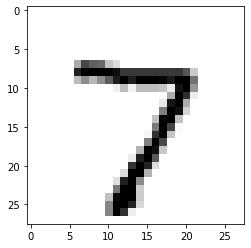

In [20]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [3.0985844e-05 4.4587737e-01 5.4156876e-01 1.2260651e-03 2.1242565e-07
 9.1658385e-06 3.2217122e-06 6.0511241e-03 5.2323909e-03 7.3337787e-07]
라벨: 1, 예측결과: 2


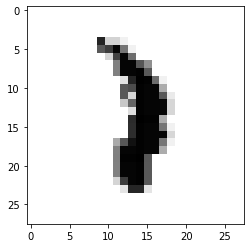

예측확률분포: [3.9911465e-06 7.3221877e-06 1.0084223e-04 6.1119485e-01 4.8011925e-06
 2.4532115e-05 5.0918644e-08 2.4753828e-01 7.6417164e-06 1.4111769e-01]
라벨: 9, 예측결과: 3


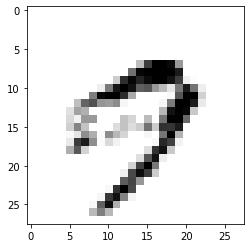

예측확률분포: [2.0188321e-05 6.7085384e-05 4.8262591e-05 7.4823658e-09 5.6698024e-08
 5.1853269e-01 4.8026896e-01 1.1474323e-08 9.1252261e-04 1.5026105e-04]
라벨: 6, 예측결과: 5


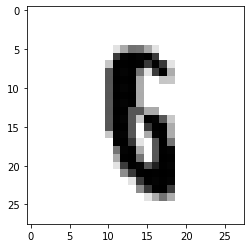

예측확률분포: [1.5837428e-01 1.4203988e-14 2.6091546e-12 2.8931229e-11 1.3253250e-09
 6.7502810e-06 8.4161901e-01 3.3952150e-14 7.8982501e-11 1.0679425e-10]
라벨: 0, 예측결과: 6


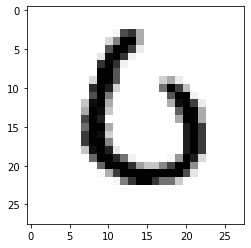

예측확률분포: [5.4748215e-02 4.5855581e-05 3.5468003e-04 1.8985746e-07 2.1527144e-06
 1.0903014e-03 2.7890695e-02 3.0089744e-09 9.1586751e-01 3.8507068e-07]
라벨: 0, 예측결과: 8


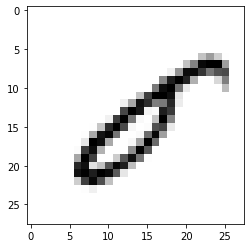

In [21]:
# model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인가?

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 5. 더 좋은 네트워크 만들기  
- 딥러닝 네트워크의 구조 자체는 바꾸지 않으면서 인식률을 99점대로 만들려면?
- 하이퍼파라미터들을 바꾸어 보기
    - Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보기
    - Dense 레이어에서 뉴런수를 바꾸어 보기
    - 학습 반복 횟수인 epoch 값을 변경

In [22]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               